## Defining and plotting Two 2D-Gaussians
<div class="alert alert-info">
    Goal: To use the *@models.custom_model* function astropy decorator to define a customized funtion, in this case the sum of two 2D-Gaussians. 
</div>

### Import Packages:

In [1]:
from astropy.modeling import models, fitting
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
## uncomment this line if you want to rotate the plot within the notebook:
%matplotlib notebook 

### Workspace:

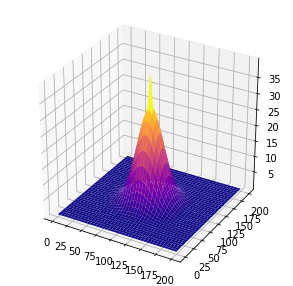

In [2]:
''' Definition of Two 2D-Gaussians function '''
@models.custom_model
def TwoGaussians(x, y,
                 amp1 = 30.,x1_mean = 100.,y1_mean = 100., ## Gauss1 param
                 x1_stddev = 20.,y1_stddev = 20.,theta1 = 0.0,
                 amp2 = 30.,x2_mean = 100.,y2_mean = 100., ## Gauss2 param
                 x2_stddev = 20.,y2_stddev = 20.,theta2 = 0.0,):
    '''Define Sum of Gauss funtions'''
    g1 = models.Gaussian2D(amp1, x1_mean, y1_mean, x1_stddev, y1_stddev, theta1)
    g2 = models.Gaussian2D(amp2, x2_mean, y2_mean, x2_stddev, y2_stddev, theta2)
    return g1(x,y) + g2(x,y)

## Customizing some parameters of the TwoGaussians function : 
TwoGausser = TwoGaussians(amp2=10,x2_stddev = 2.,y2_stddev = 2.)
## Make X,Y,Z data for the TWO 2D-Gaussians:
Xg, Yg = np.mgrid[0:201,0:201]
Zg2 = TwoGausser(Xg,Yg)

''' Fit Two 2D-Gaussians '''
## Initial Guess :
TwoG_guess = TwoGaussians(30, 100, 110, 10, 5, 5, 30, 100, 100, 5, 1, 5)
## Finding best fit:
fit2DG = fitting.LevMarLSQFitter()
TwoG_out = fit2DG(TwoG_guess,Xg,Yg,Zg2,maxiter=120) ## maxiter keyword is the max number of iterations. 

''' Plot Output Two 2D Gaussians '''
Zout = TwoG_out(Xg,Yg)
plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(Xg,Yg,Zout,cmap='plasma')
plt.show()